In [14]:
from scipy.integrate import odeint
from scipy import arange
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
### FitzHugh-Nagumo Model Class
class FHN:
    ## Must be in same order as dXdt return
    label = ['v', 'w']
    nVar = len(label)

    ## Parameters
    p = {
    'a': 0.08,
    'b': 0.7,
    'c': 0.8,
    'I': 0.4
    }

    ## Get initial values for the system
    def __init__(self, X0 = [0.2, 0.1]):
        self.name = self.__class__.__name__
        if self.nVar != len(X0):
            print 'ERROR:', self.nVar, 'initial values required for:', self.name
        else: 
            self.X0 = X0
            
    def f(self, v): return v - v**3/3

    ## Define the dX/dt for the system
    def dXdt(self, X, t):
        v, w = X

        dvdt = self.f(v) - w + self.p['I']
        dwdt = self.p['a']*(self.p['b'] + v - self.p['c']*w)
        
        return dvdt, dwdt

In [16]:
## Time interval of the simulations
t = arange(0.0, 200.0, 0.01)
m = FHN()

## Solving the diffential equations
sol = odeint(m.dXdt, m.X0, t)

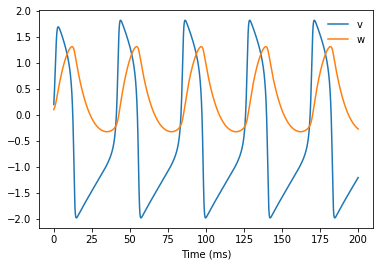

In [17]:
## Plot solution timeseries
fig, ax = plt.subplots()
for i, v in enumerate(m.label):
    figY = plt.plot(t, sol[:,i], label=v)

plt.xlabel('Time (ms)')
plt.legend(frameon=False)
plt.show()

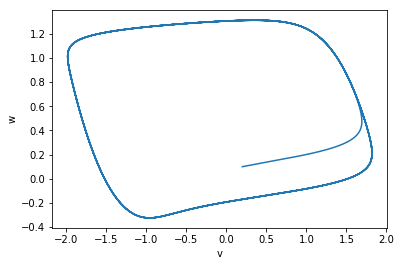

In [18]:
## Phase portrait
fig, ax = plt.subplots()

x, z = sol.T
plt.plot(x, z)

plt.xlabel('v')
plt.ylabel('w')
plt.show()